<a href="https://colab.research.google.com/github/sidharthram99/sidharth/blob/main/EV_MARKET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("data.csv")
data.head(8)

,Unnamed: 0,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,No,RWD,Type 2 CCS,Hatchback,C,5,30000
2,2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
5,5,Lucid,Air,2.8,250,610,180,620,Yes,AWD,Type 2 CCS,Sedan,F,5,105000
6,6,Volkswagen,e-Golf,9.6,150,190,168,220,No,FWD,Type 2 CCS,Hatchback,C,5,31900
7,7,Peugeot,e-208,8.1,150,275,164,420,No,FWD,Type 2 CCS,Hatchback,B,5,29682


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       103 non-null    int64  
 1   Brand            103 non-null    object 
 2   Model            103 non-null    object 
 3   AccelSec         103 non-null    float64
 4   TopSpeed_KmH     103 non-null    int64  
 5   Range_Km         103 non-null    int64  
 6   Efficiency_WhKm  103 non-null    int64  
 7   FastCharge_KmH   103 non-null    int64  
 8   RapidCharge      103 non-null    object 
 9   PowerTrain       103 non-null    object 
 10  PlugType         103 non-null    object 
 11  BodyStyle        103 non-null    object 
 12  Segment          103 non-null    object 
 13  Seats            103 non-null    int64  
 14  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(7), object(7)
memory usage: 12.2+ KB


In [ ]:
data.shape

(103, 15)

In [ ]:
data.columns

Index(['Unnamed: 0', 'Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

In [ ]:
data.isna().sum()

,0
Unnamed: 0,0
Brand,0
Model,0
AccelSec,0
TopSpeed_KmH,0
Range_Km,0
Efficiency_WhKm,0
FastCharge_KmH,0
RapidCharge,0
PowerTrain,0


In [ ]:
data = data.drop(columns=['Unnamed: 0'])


In [ ]:
data['RapidCharge'] = data['RapidCharge'].replace({'Yes': 1, 'No': 0})
print(data[["RapidCharge"]].head())

   RapidCharge
0            1
1            0
2            1
3            1
4            1


<ipython-input-49-6ae51d178de0>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['RapidCharge'] = data['RapidCharge'].replace({'Yes': 1, 'No': 0})


In [ ]:
euro_to_inr = 90
data['PriceINR'] = data['PriceEuro'] * euro_to_inr
print(data[['PriceEuro', 'PriceINR']].head())

   PriceEuro  PriceINR
0      55480   4993200
1      30000   2700000
2      56440   5079600
3      68040   6123600
4      32997   2969730


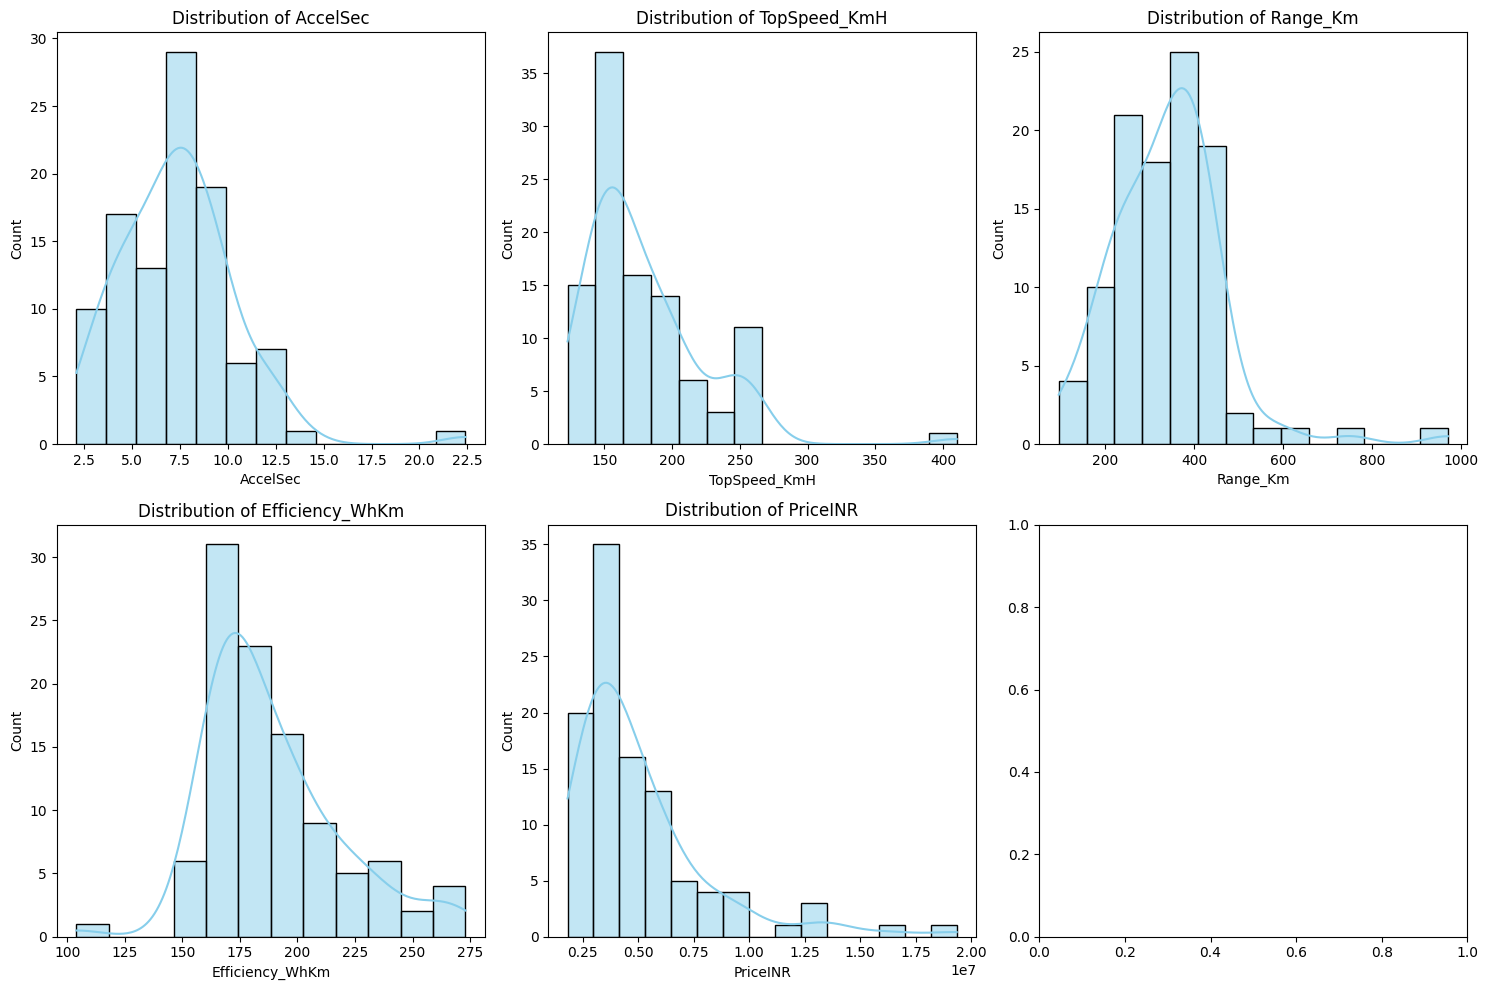

In [ ]:
numeric_cols = ['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm', 'PriceINR']
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, col in enumerate(numeric_cols):
    sns.histplot(data[col], kde=True, ax=axes[i//3, i%3], color='skyblue')
    axes[i//3, i%3].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

<ipython-input-52-7950dc037f48>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[col], order=data[col].value_counts().index, palette='viridis', ax=axes[i//2, i%2])
<ipython-input-52-7950dc037f48>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[col], order=data[col].value_counts().index, palette='viridis', ax=axes[i//2, i%2])
<ipython-input-52-7950dc037f48>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[col], order=data[col].value_counts().index, palette='viridis', ax=axes[i//2, i%2])
<ipython-input-52-7950dc037f

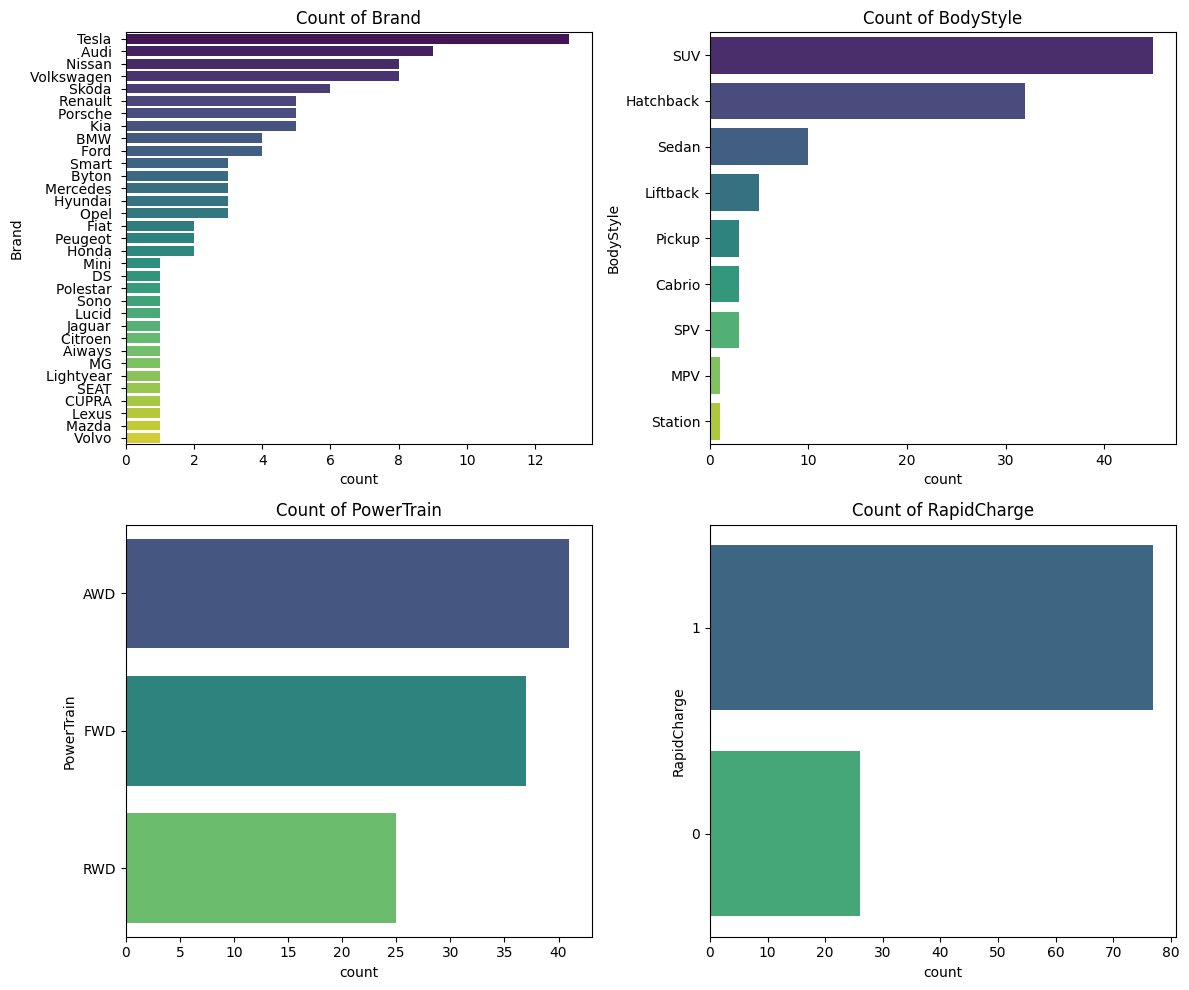

In [ ]:
categorical_cols = ['Brand', 'BodyStyle', 'PowerTrain', 'RapidCharge']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, col in enumerate(categorical_cols):
    sns.countplot(y=data[col], order=data[col].value_counts().index, palette='viridis', ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Count of {col}')

plt.tight_layout()
plt.show()

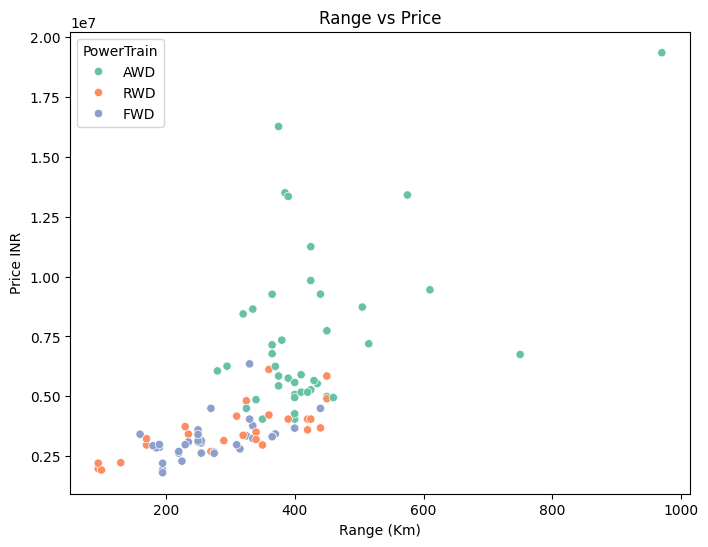

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Range_Km', y='PriceINR', hue='PowerTrain', data=data, palette='Set2')
plt.title("Range vs Price")
plt.xlabel("Range (Km)")
plt.ylabel("Price INR")
plt.show()

<ipython-input-54-8a4abba4ad11>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_efficiency.index, y=brand_efficiency.values, palette='muted')


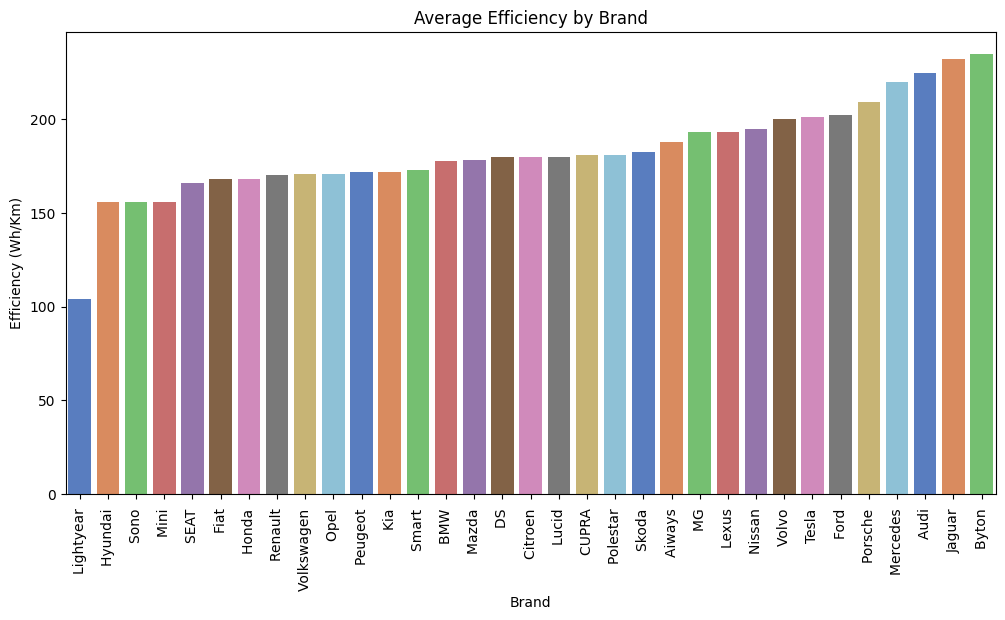

In [ ]:
plt.figure(figsize=(12, 6))
brand_efficiency = data.groupby('Brand')['Efficiency_WhKm'].mean().sort_values()
sns.barplot(x=brand_efficiency.index, y=brand_efficiency.values, palette='muted')
plt.xticks(rotation=90)
plt.title("Average Efficiency by Brand")
plt.xlabel("Brand")
plt.ylabel("Efficiency (Wh/Km)")
plt.show()

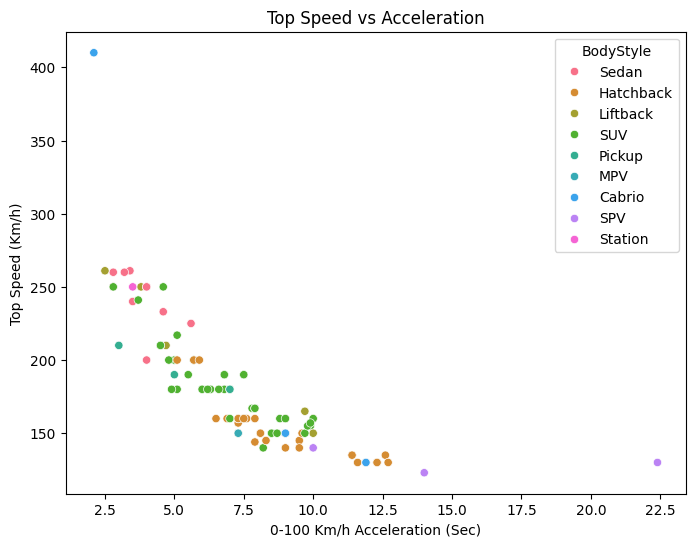

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='AccelSec', y='TopSpeed_KmH', hue='BodyStyle', data=data, palette='husl')
plt.title("Top Speed vs Acceleration")
plt.xlabel("0-100 Km/h Acceleration (Sec)")
plt.ylabel("Top Speed (Km/h)")
plt.show()

<ipython-input-56-bfa1b9daf6ee>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='BodyStyle', y='Range_Km', data=data, palette='Set3')


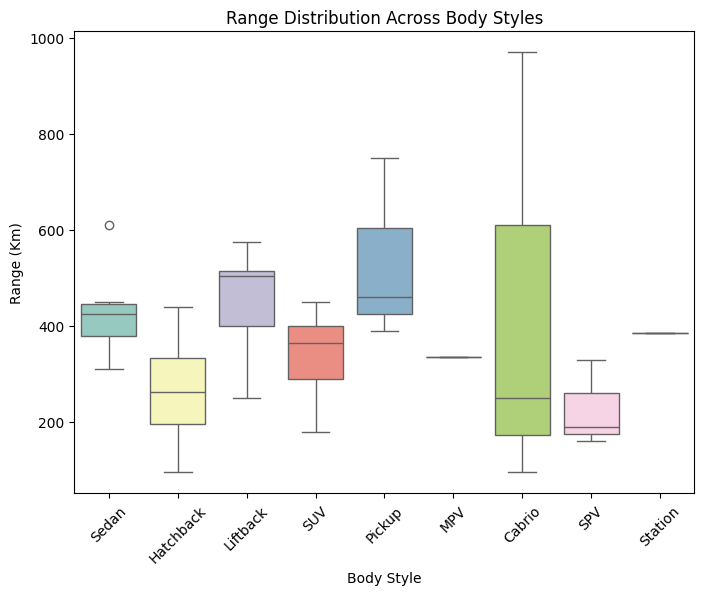

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='BodyStyle', y='Range_Km', data=data, palette='Set3')
plt.xticks(rotation=45)
plt.title("Range Distribution Across Body Styles")
plt.xlabel("Body Style")
plt.ylabel("Range (Km)")
plt.show()

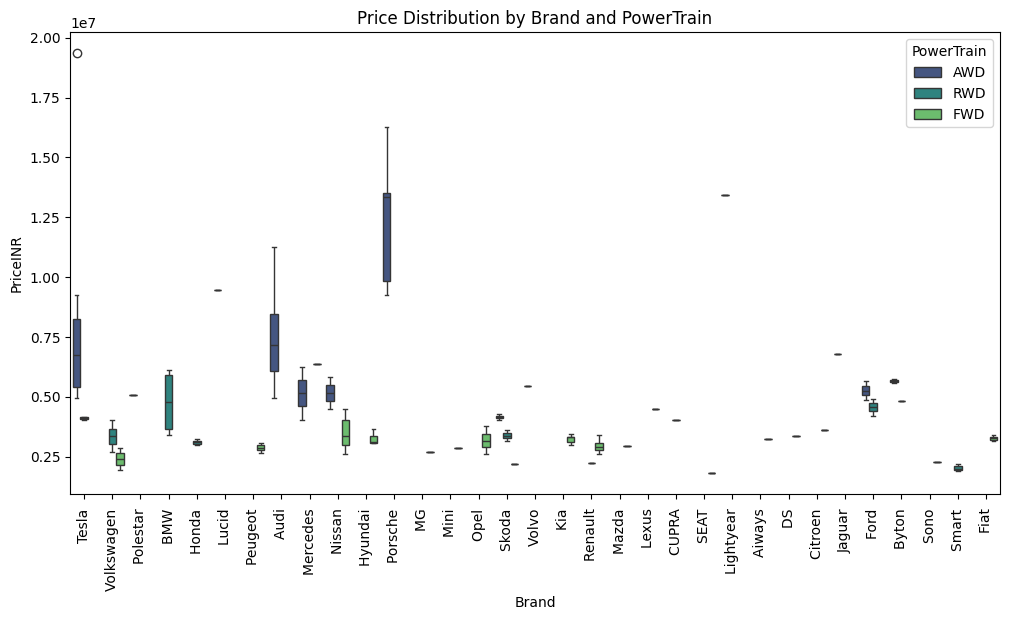

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Brand', y='PriceINR', hue='PowerTrain', data=data, palette='viridis')
plt.xticks(rotation=90)
plt.title("Price Distribution by Brand and PowerTrain")
plt.xlabel("Brand")
plt.ylabel("PriceINR")
plt.show()

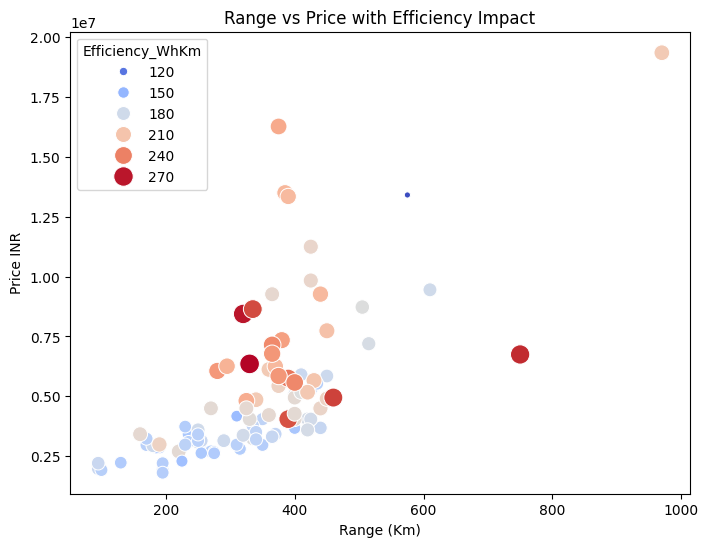

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Range_Km', y='PriceINR', size='Efficiency_WhKm', hue='Efficiency_WhKm',
                data=data, palette='coolwarm', sizes=(20, 200))
plt.title("Range vs Price with Efficiency Impact")
plt.xlabel("Range (Km)")
plt.ylabel("Price INR")
plt.show()

In [ ]:
def seat_segment(seats):
    if seats <= 3:
        return "Small Car (Personal)"
    elif seats <= 5:
        return "Family Car"
    else:
        return "Large Car (Group/Family)"

# Apply the function to the 'Seats' column
data['Seat_Segment'] = data['Seats'].apply(seat_segment)

# View the updated dataset
print(data[['Seats', 'Seat_Segment']].head())

   Seats Seat_Segment
0      5   Family Car
1      5   Family Car
2      5   Family Car
3      5   Family Car
4      4   Family Car


                          Avg_PriceINR  Vehicle_Count  Avg_Range_Km  \
Seat_Segment                                                          
Family Car                4.999443e+06             92    335.380435   
Large Car (Group/Family)  5.920970e+06              9    427.222222   
Small Car (Personal)      2.067840e+06              2     97.500000   

                          Avg_Efficiency_WhKm  
Seat_Segment                                   
Family Car                         185.967391  
Large Car (Group/Family)           225.777778  
Small Car (Personal)               171.500000  


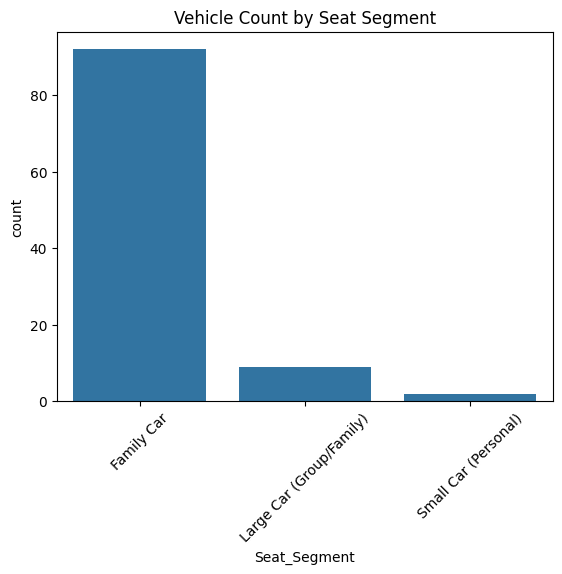

In [ ]:
seat_segment_summary = data.groupby('Seat_Segment').agg({
    'PriceINR': ['mean', 'count'],
    'Range_Km': 'mean',
    'Efficiency_WhKm': 'mean'
})

# Rename columns for clarity
seat_segment_summary.columns = ['Avg_PriceINR', 'Vehicle_Count', 'Avg_Range_Km', 'Avg_Efficiency_WhKm']
print(seat_segment_summary)

# Visualize the count of vehicles in each Seat Segment
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Seat_Segment', data=data)
plt.title('Vehicle Count by Seat Segment')
plt.xticks(rotation=45)
plt.show()

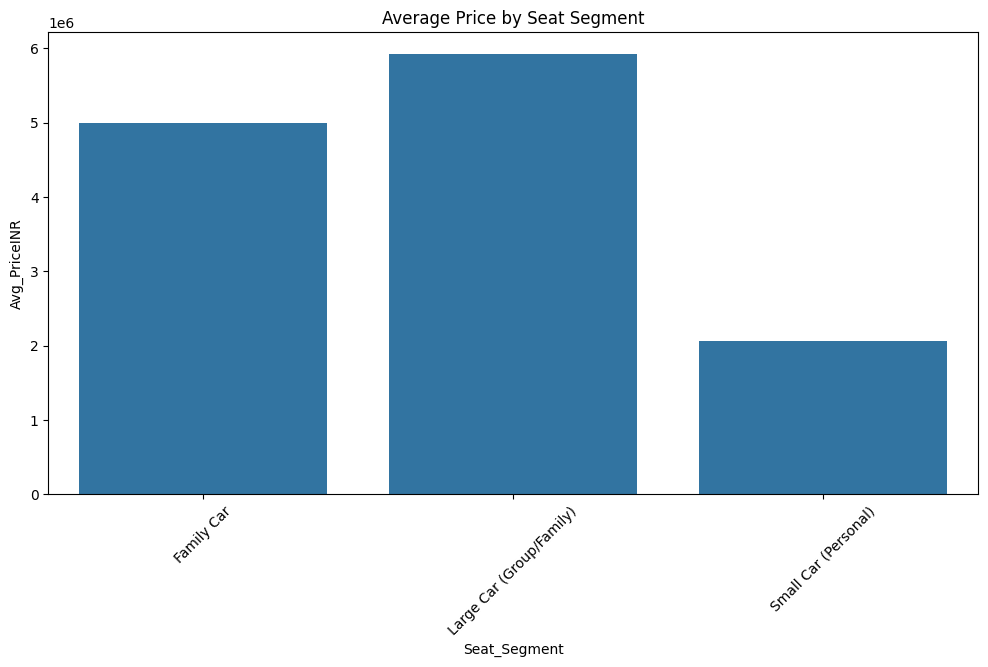

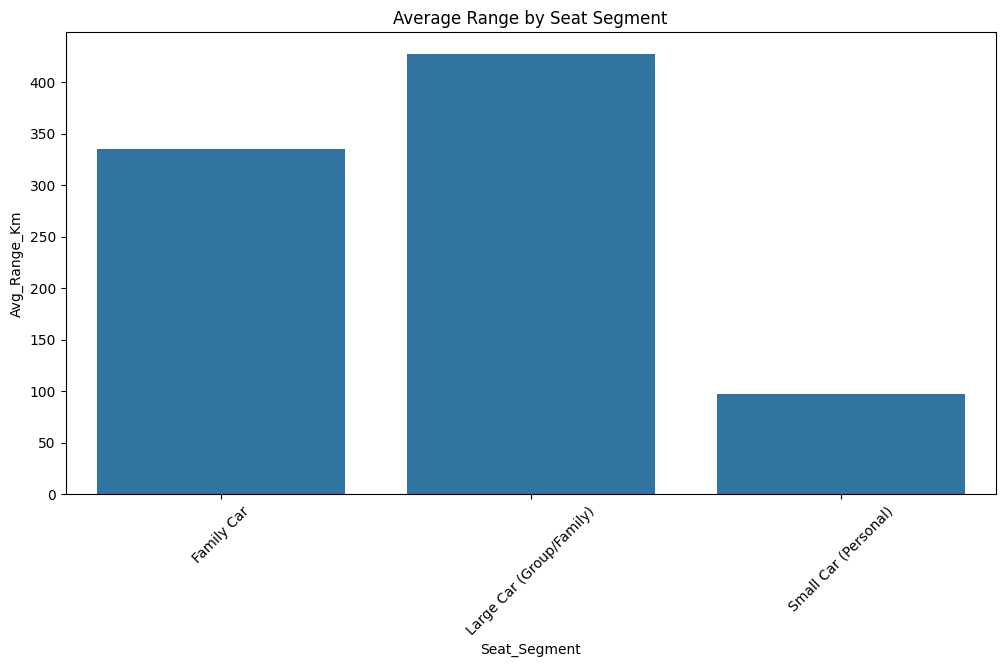

In [ ]:
# Visualize average price and range by seat segment
seat_segment_summary.reset_index(inplace=True)

plt.figure(figsize=(12, 6))
sns.barplot(x='Seat_Segment', y='Avg_PriceINR', data=seat_segment_summary)
plt.title('Average Price by Seat Segment')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Seat_Segment', y='Avg_Range_Km', data=seat_segment_summary)
plt.title('Average Range by Seat Segment')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#demographic
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering
clustering_features = data[['Seats', 'PriceINR', 'Range_Km', 'Efficiency_WhKm']]

# Check for missing values and drop them (if any)
clustering_features = clustering_features.dropna()

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_features)

# Convert back to DataFrame for easier interpretation
scaled_data = pd.DataFrame(scaled_features, columns=clustering_features.columns)
print(scaled_data.head())

      Seats  PriceINR  Range_Km  Efficiency_WhKm
0  0.147109 -0.009761  0.886862        -0.957247
1  0.147109 -0.759866 -0.548531        -0.753325
2  0.147109  0.018501  0.488142        -0.277506
3  0.147109  0.359993  0.169166         0.572171
4 -1.115578 -0.671638 -1.345971        -0.719338


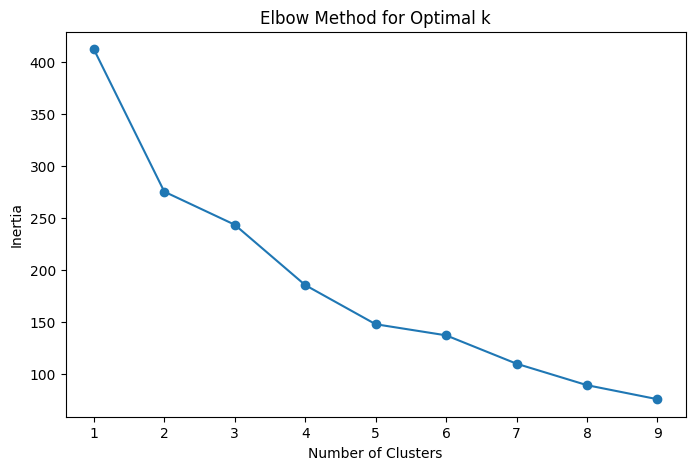

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the Elbow Method
inertia = []
k_values = range(1, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [ ]:
from sklearn.decomposition import PCA
pca=PCA()
pca = PCA(n_components=2)
pca.fit(scaled_features)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()
pca_summary = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_variance_ratio))],
    'Explained Variance': explained_variance_ratio,
    'Cumulative Explained Variance': cumulative_variance
})
print(pca_summary)


  Principal Component  Explained Variance  Cumulative Explained Variance
0                 PC1            0.513941                       0.513941
1                 PC2            0.252933                       0.766873


In [ ]:
loadings=pca.components_

loadings_df=pd.DataFrame(loadings,columns=clustering_features.columns,index=['PC1','PC2'])
print(loadings_df)
loadings_df

        Seats  PriceINR  Range_Km  Efficiency_WhKm
PC1  0.316312  0.565110  0.593029         0.478449
PC2  0.824830 -0.481182 -0.174920         0.239837


,Seats,PriceINR,Range_Km,Efficiency_WhKm
PC1,0.316312,0.565110,0.593029,0.478449
PC2,0.824830,-0.481182,-0.174920,0.239837


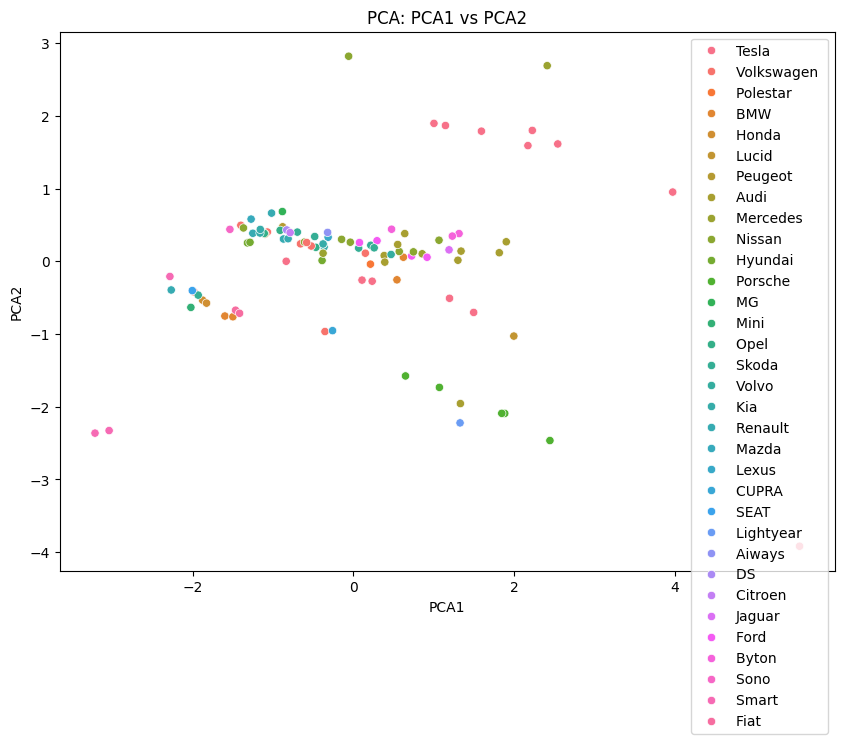

In [ ]:
principal_components = pca.fit_transform(scaled_data)
data['PCA1'] = principal_components[:, 0]
data['PCA2'] = principal_components[:, 1]
pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
plt.figure(figsize=(10, 7))
sns.scatterplot(x=data['PCA1'], y=data['PCA2'], hue=data['Brand'])  # Color by 'Brand' or other categorical variable

plt.title("PCA: PCA1 vs PCA2")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(loc="best")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# View the clustered data
print(data[['Seats', 'PriceINR', 'Range_Km', 'Efficiency_WhKm', 'Cluster']].head())

   Seats  PriceINR  Range_Km  Efficiency_WhKm  Cluster
0      5   4993200       450              161        0
1      5   2700000       270              167        0
2      5   5079600       400              181        0
3      5   6123600       360              206        1
4      4   2969730       170              168        0


         AccelSec  TopSpeed_KmH    Range_Km  Efficiency_WhKm  FastCharge_KmH  \
Cluster                                                                        
0        8.607812    159.609375  288.984375       173.328125      363.906250   
1        5.172727    212.454545  421.515152       221.575758      573.939394   
2        6.700000    205.166667  415.000000       179.833333      588.333333   

         RapidCharge     Seats     PriceEuro      PriceINR      PCA1      PCA2  
Cluster                                                                         
0           0.703125  4.687500  37650.859375  3.388577e+06 -0.873449 -0.006498  
1           0.787879  4.939394  86165.757576  7.754918e+06  1.445569 -0.222970  
2           1.000000  6.666667  82577.666667  7.431990e+06  1.366168  1.295648  


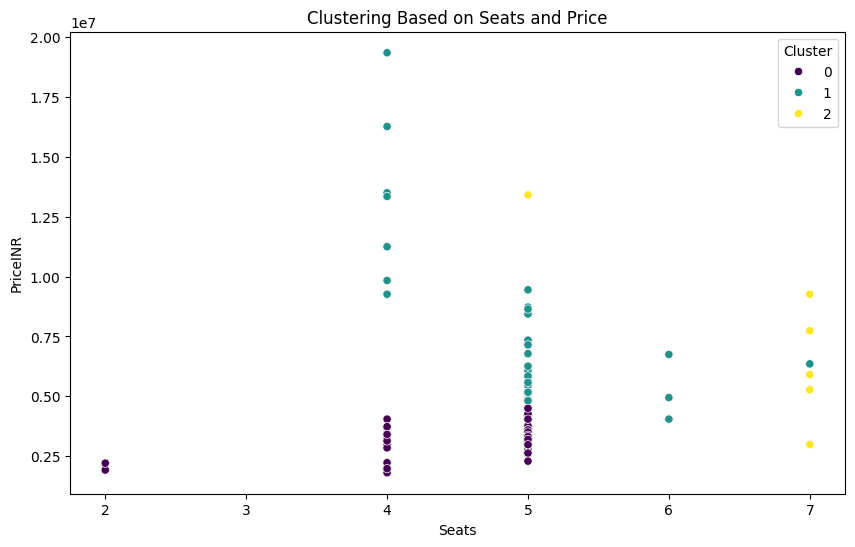

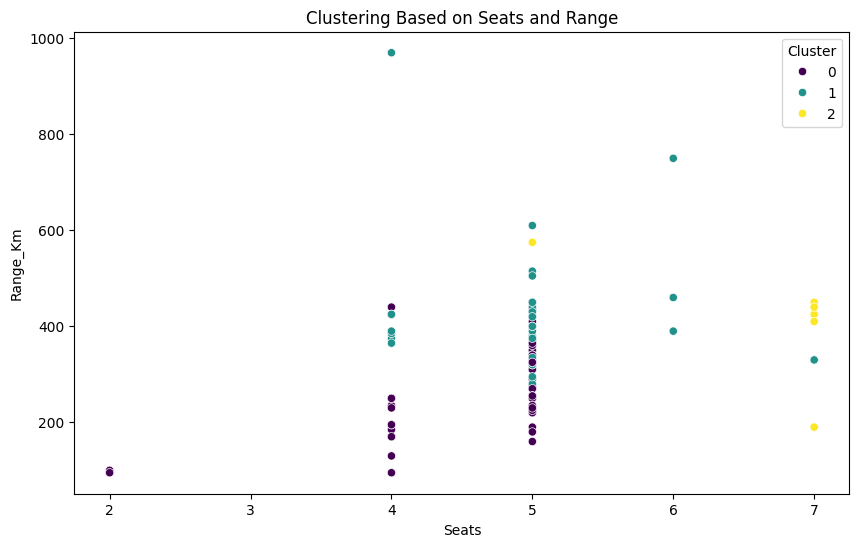

In [ ]:
cluster_summary = data.groupby('Cluster').mean(numeric_only=True)
print(cluster_summary)

# Visualize clusters
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Seats', y='PriceINR', hue='Cluster', data=data, palette='viridis')
plt.title('Clustering Based on Seats and Price')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Seats', y='Range_Km', hue='Cluster', data=data, palette='viridis')
plt.title('Clustering Based on Seats and Range')
plt.show()


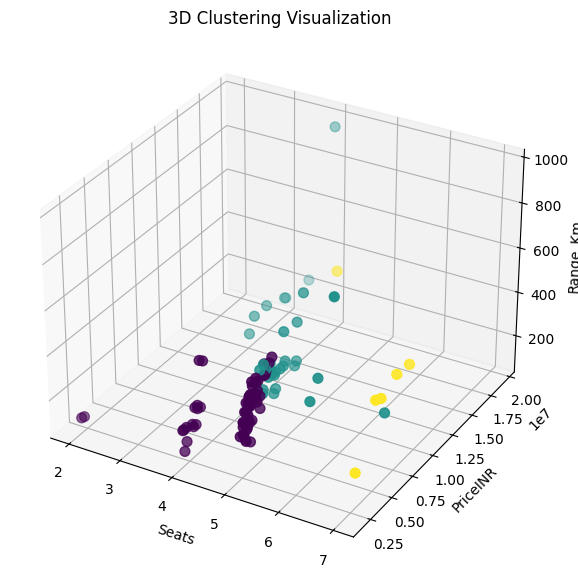

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data['Seats'], data['PriceINR'], data['Range_Km'], c=data['Cluster'], cmap='viridis', s=50)
ax.set_xlabel('Seats')
ax.set_ylabel('PriceINR')
ax.set_zlabel('Range_Km')
plt.title('3D Clustering Visualization')
plt.show()

In [ ]:
#Behavioral
behavioral_features = data[['AccelSec', 'TopSpeed_KmH', 'Range_Km',
                            'Efficiency_WhKm', 'FastCharge_KmH', 'PriceINR']]


scaled_features = scaler.fit_transform(behavioral_features)

# Convert back to DataFrame for easier analysis
scaled_data = pd.DataFrame(scaled_features, columns=behavioral_features.columns)
print(scaled_data.head())

   AccelSec  TopSpeed_KmH  Range_Km  Efficiency_WhKm  FastCharge_KmH  PriceINR
0 -0.931186      1.240881  0.886862        -0.957247        2.442530 -0.009761
1  0.867167     -0.442660 -0.548531        -0.753325       -0.957208 -0.759866
2 -0.897883      0.710450  0.488142        -0.277506        0.865840  0.018501
3 -0.198524      0.018584  0.169166         0.572171        0.570211  0.359993
4  0.700653     -0.788593 -1.345971        -0.719338       -1.252837 -0.671638


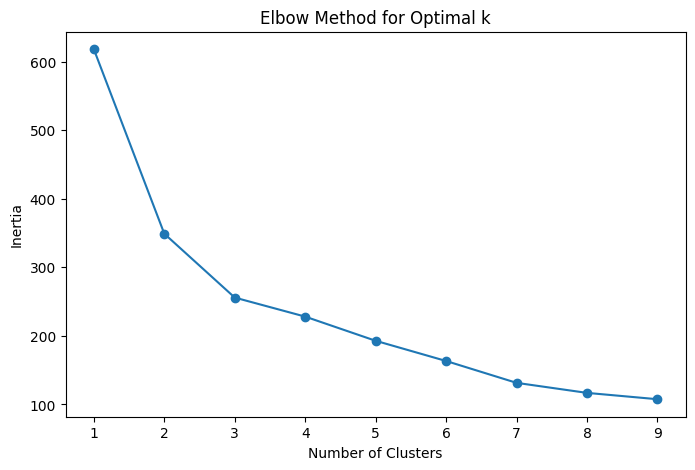

In [ ]:
inertia = []
k_values = range(1, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
data['Behavior_Cluster'] = kmeans.fit_predict(scaled_data)

# View clustered data
print(data[['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'PriceINR', 'Behavior_Cluster']].head())

   AccelSec  TopSpeed_KmH  Range_Km  PriceINR  Behavior_Cluster
0       4.6           233       450   4993200                 1
1      10.0           160       270   2700000                 0
2       4.7           210       400   5079600                 2
3       6.8           180       360   6123600                 2
4       9.5           145       170   2969730                 0


In [ ]:
behavior_summary = data.groupby('Behavior_Cluster').mean(numeric_only=True)
print(behavior_summary)

# Count the number of vehicles per segment
print(data['Behavior_Cluster'].value_counts())

                  AccelSec  TopSpeed_KmH    Range_Km  Efficiency_WhKm  \
Behavior_Cluster                                                        
0                 9.606250    148.520833  249.166667       171.125000   
1                 3.855556    249.611111  494.444444       193.111111   
2                 6.251351    184.729730  379.324324       210.648649   

                  FastCharge_KmH  RapidCharge     Seats      PriceEuro  \
Behavior_Cluster                                                         
0                     282.500000     0.666667  4.666667   33235.104167   
1                     743.333333     0.944444  5.111111  109304.944444   
2                     508.648649     0.756757  5.054054   59076.135135   

                      PriceINR      PCA1      PCA2   Cluster  
Behavior_Cluster                                              
0                 2.991159e+06 -1.179357  0.071938  0.041667  
1                 9.837445e+06  1.781123 -0.705658  1.166667  
2          

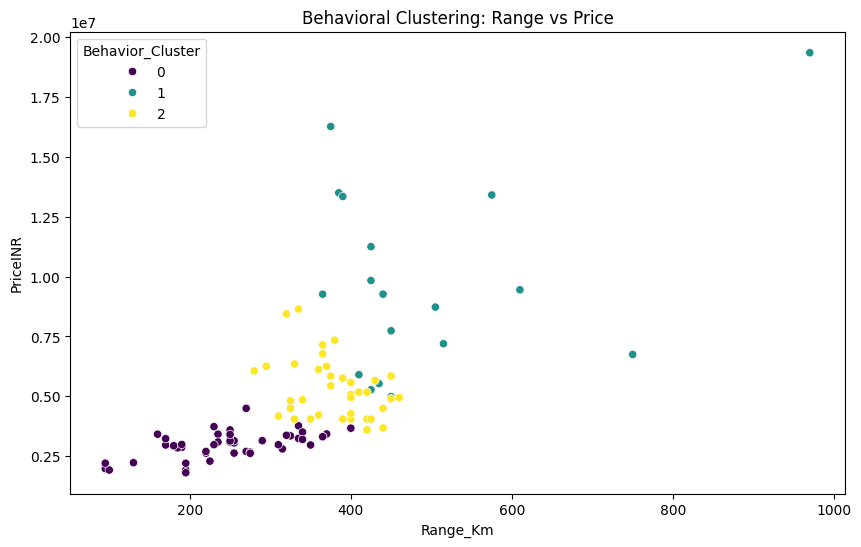

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Range_Km', y='PriceINR', hue='Behavior_Cluster', data=data, palette='viridis')
plt.title('Behavioral Clustering: Range vs Price')
plt.show()

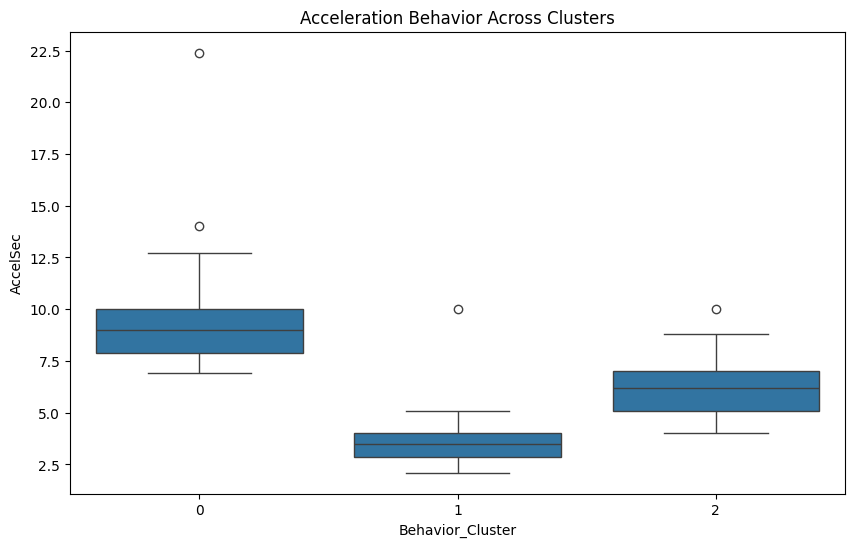

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Behavior_Cluster', y='AccelSec', data=data)
plt.title('Acceleration Behavior Across Clusters')
plt.show()

In [ ]:
#economic
price_data = data['PriceINR'].values.reshape(-1,1)

scaled_price = scaler.fit_transform(price_data)


kmeans = KMeans(n_clusters=3, random_state=42)
data['Price_Cluster'] = kmeans.fit_predict(scaled_price)


print(data[['Brand', 'Model', 'PriceINR', 'Price_Cluster']].head())



         Brand                          Model  PriceINR  Price_Cluster
0       Tesla   Model 3 Long Range Dual Motor   4993200              0
1  Volkswagen                       ID.3 Pure   2700000              0
2    Polestar                               2   5079600              0
3         BMW                            iX3    6123600              1
4       Honda                              e    2969730              0


Price_Cluster
0    0.093605
1    0.294807
2    0.724674
Name: PriceINR, dtype: float64


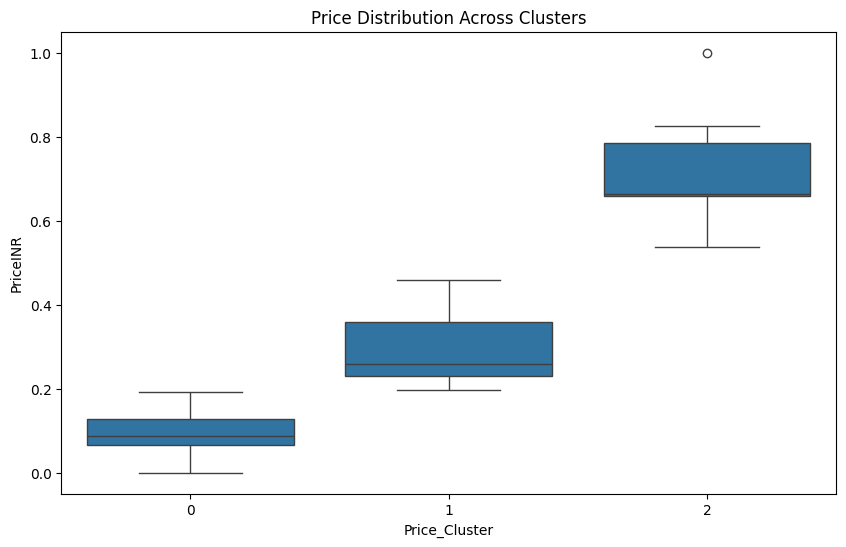

In [ ]:

cluster_summary = data.groupby('Price_Cluster')['PriceINR'].mean().sort_values()
print(cluster_summary)

plt.figure(figsize=(10, 6))
sns.boxplot(x='Price_Cluster', y='PriceINR', data=data)
plt.title('Price Distribution Across Clusters')
plt.show()

In [ ]:

profiles = {
    "Urban Young Professionals": {"PriceINR": -0.5, "Range_Km": 0.3, "Efficiency_WhKm": 0.2},
    "Eco-Conscious Families": {"PriceINR": -0.2, "Range_Km": 0.5, "Efficiency_WhKm": 0.3},
    "Luxury Seekers": {"PriceINR": 0.5, "Range_Km": 0.2, "Efficiency_WhKm": 0.1}
}

# Calculate match scores
for profile, weights in profiles.items():
    data[profile] = (weights["PriceINR"] * data["PriceINR"] +
                     weights["Range_Km"] * data["Range_Km"] +
                     weights["Efficiency_WhKm"] * data["Efficiency_WhKm"])

In [ ]:
matches = data.groupby("Cluster")[["Urban Young Professionals", "Eco-Conscious Families", "Luxury Seekers"]].mean()
print(matches)

         Urban Young Professionals  Eco-Conscious Families  Luxury Seekers
Cluster                                                                   
0                    -1.694167e+06           -6.775190e+05    1.694364e+06
1                    -3.877288e+06           -1.550706e+06    3.877566e+06
2                    -3.715835e+06           -1.486137e+06    3.716096e+06


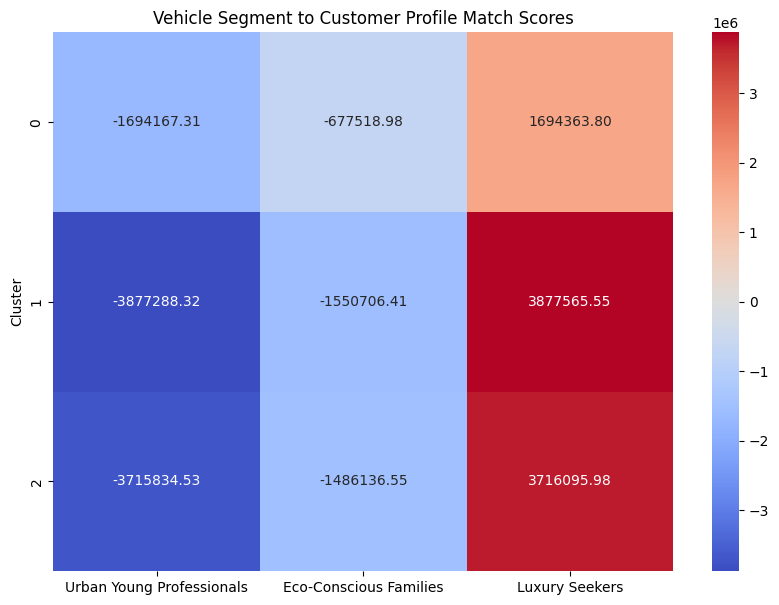

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
sns.heatmap(matches, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Vehicle Segment to Customer Profile Match Scores")
plt.show()